<a href="https://colab.research.google.com/github/Aryasreeg/Aryasreeg/blob/main/Decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [53]:
df=pd.read_csv('Diabetes (1).csv',sep=',')

In [54]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [55]:
x=df.drop('Outcome',axis=1)
y=df.Outcome

In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [57]:
sc=StandardScaler()
scaler=sc.fit(xtrain)
scaler

StandardScaler()

In [58]:
xtrain_scaled=scaler.transform(xtrain)

xtest_scaled=scaler.transform(xtest)

In [59]:
xtrain_scaled

array([[ 1.51659096,  0.75052361,  0.56475624, ...,  0.79582546,
         0.52952571,  0.56793202],
       [ 1.81201827,  0.24475163, -0.34790438, ...,  1.22865369,
        -0.06968859,  0.39844951],
       [ 0.92573636, -0.60873859,  0.26053603, ...,  0.70401341,
        -0.79424873,  0.99163829],
       ...,
       [ 2.69830017,  0.14991938,  1.07178992, ...,  1.51720584,
         0.36443605,  0.73741453],
       [ 0.03945446,  1.57240307,  0.1591293 , ...,  1.54343785,
         0.04648561, -0.61844554],
       [ 1.51659096, -0.60873859,  0.36194277, ...,  0.14002512,
         0.61512775,  1.07637954]])

In [60]:
dec=DecisionTreeClassifier()
history=dec.fit(xtrain_scaled,ytrain)

In [61]:
y_pred1=dec.predict(xtrain_scaled)
accuracy_score(y_pred1,ytrain)

1.0

In [62]:
y_pred=dec.predict(xtest_scaled)
accuracy_score(y_pred,ytest)

0.7142857142857143

In [63]:
pip install graphviz

In [64]:
pip install pydotplus

In [65]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [66]:
featurecols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [67]:
dot_data=StringIO()

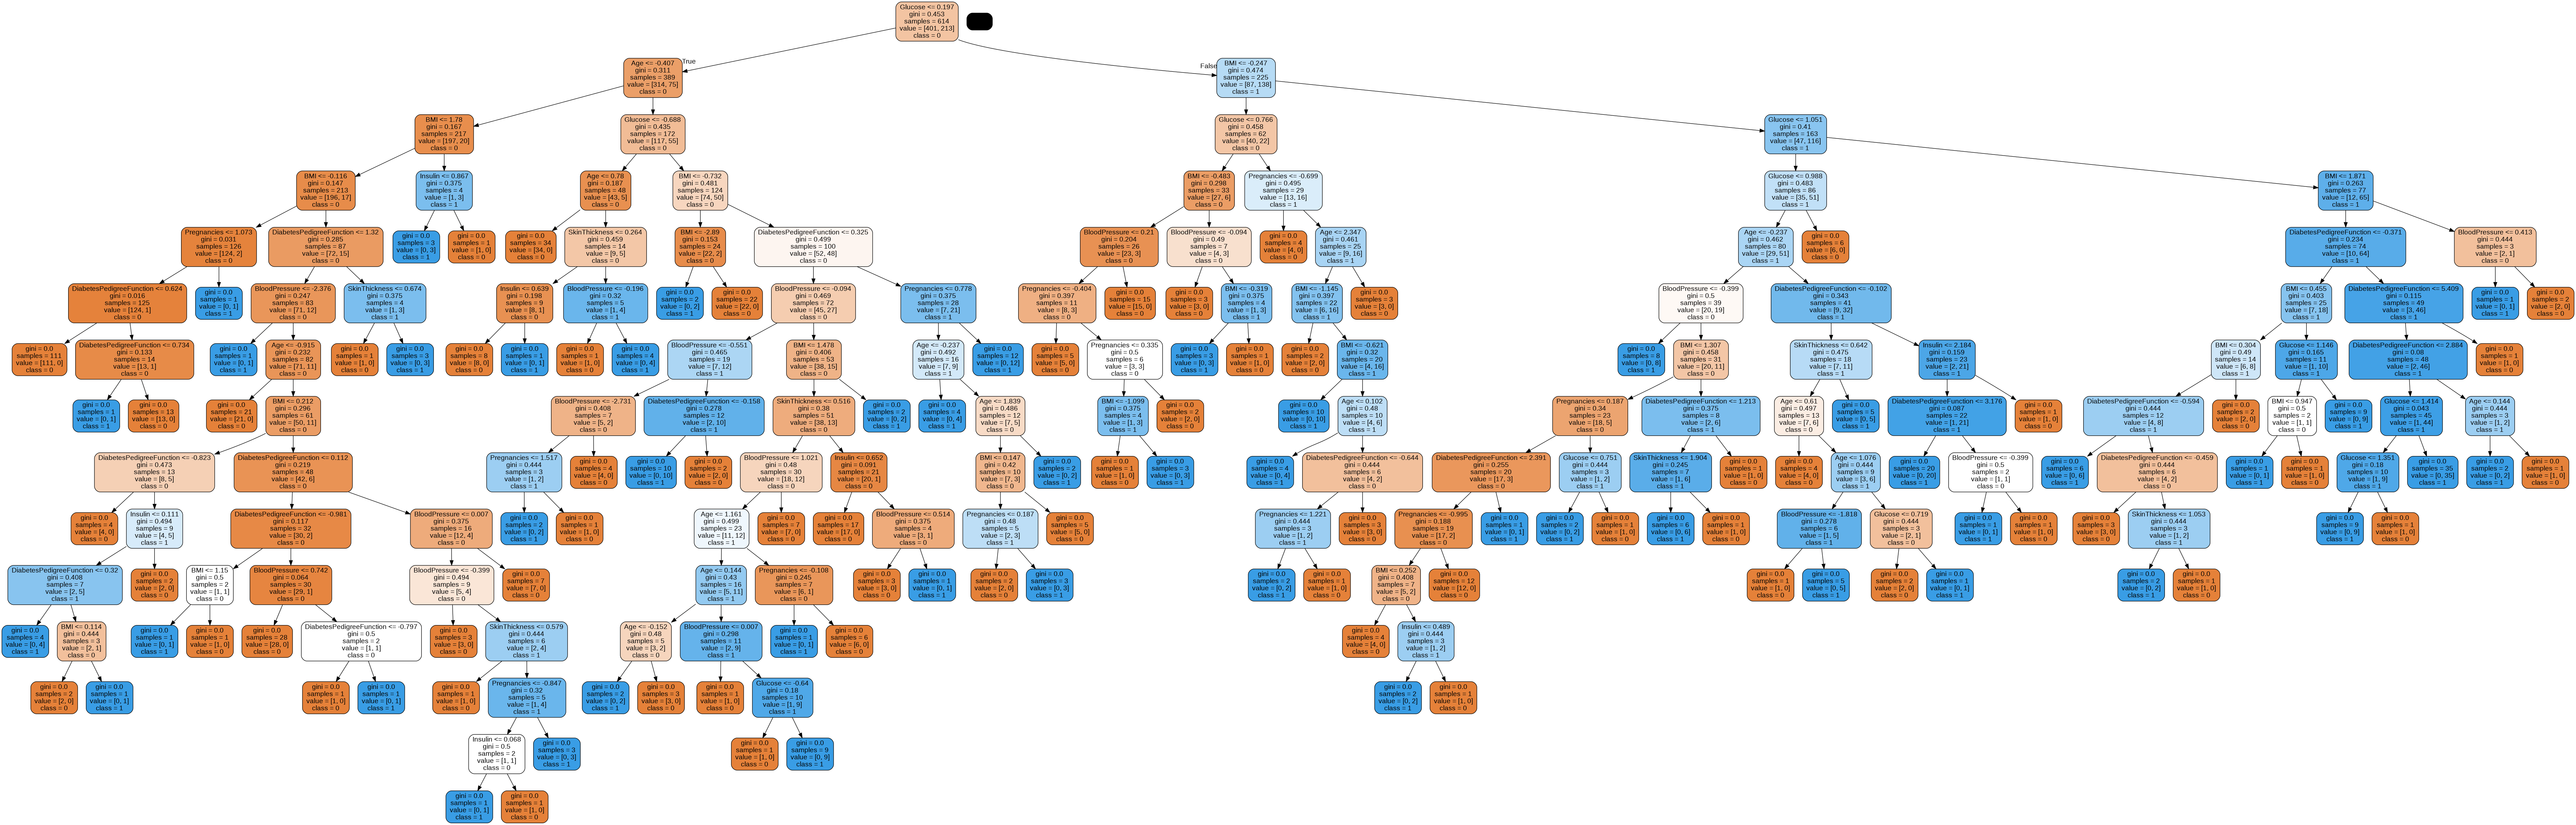

In [68]:
export_graphviz(dec,out_file=dot_data,
               filled=True,rounded=True,
               feature_names=featurecols,
               class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# **Pre-Pruning**
Using max-depth

In [69]:
dec=DecisionTreeClassifier(max_depth=3)
history=dec.fit(xtrain_scaled,ytrain)

In [70]:
y_pred1=dec.predict(xtrain_scaled)
accuracy_score(y_pred1,ytrain)

0.7736156351791531

In [71]:
y_pred=dec.predict(xtest_scaled)
accuracy_score(y_pred,ytest)

0.7857142857142857

In [72]:
featurecols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [73]:
dot_data=StringIO()

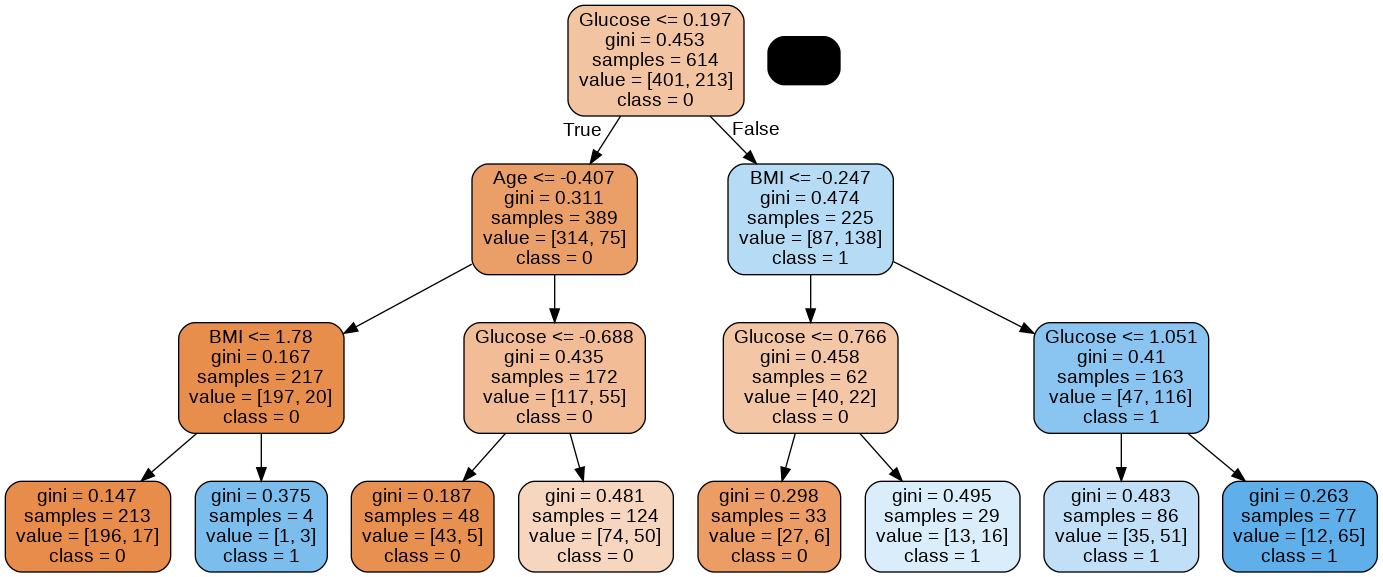

In [74]:
export_graphviz(dec,out_file=dot_data,
               filled=True,rounded=True,
               feature_names=featurecols,
               class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## **Post-Pruning**:

max_leaf_nodes

## Cost complexity pruning technique(CCP)

After completing the tree designing, we check the CCp alpha value, used to decide how much we need to prune the treee.
The pruning amount increases if the value of ccp alpha value is high
ccp_alphas

In [80]:
path=dec.cost_complexity_pruning_path(xtrain_scaled,ytrain)
ccp_alphas=path.ccp_alphas
print(ccp_alphas)


[0.         0.00130293 0.0014806  0.00152687 0.00155111 0.00155463
 0.0015608  0.00161564 0.00173724 0.00194297 0.00216111 0.00217155
 0.00217155 0.00217155 0.00217155 0.00217155 0.00217155 0.00221679
 0.00235031 0.00237281 0.00241261 0.002443   0.002443   0.002443
 0.002443   0.002443   0.00245154 0.00248177 0.00260586 0.00266509
 0.00273962 0.002792   0.002792   0.0028389  0.0028954  0.00293345
 0.00304581 0.00316685 0.00317998 0.00332519 0.00347264 0.00427524
 0.00433205 0.00448509 0.00454443 0.00454842 0.0046007  0.00487375
 0.00548446 0.00553495 0.00574427 0.00597177 0.00687962 0.0071113
 0.00738864 0.00834583 0.00923453 0.00991979 0.01008115 0.01619014
 0.01862736 0.0821149 ]


for each alpha we will append our model to a list

In [81]:
decs=[]
for ccp_alpha in ccp_alphas:
  dec=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
  dec.fit(xtrain_scaled,ytrain)
  decs.append(dec)

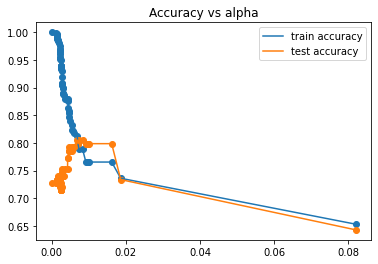

In [82]:
import matplotlib.pyplot as plt

train_acc=[]
test_acc=[]
for d in decs:
  ytrain_pred=d.predict(xtrain_scaled)
  ytest_pred=d.predict(xtest_scaled)
  train_acc.append(accuracy_score(ytrain_pred,ytrain))
  test_acc.append(accuracy_score(ytest_pred,ytest))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train accuracy')
plt.plot(ccp_alphas,test_acc,label='test accuracy')
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()


In [83]:
dec1=DecisionTreeClassifier(random_state=0,ccp_alpha=0.02)

dec1.fit(xtrain_scaled,ytrain)


DecisionTreeClassifier(ccp_alpha=0.02, random_state=0)

In [84]:
y_pred1=dec1.predict(xtest_scaled)
accuracy_score(y_pred1,ytest)

0.7337662337662337